In [ ]:
import pandas as pd
basedatos_df = pd.read_csv('basedatos_modelo_final.csv', sep =';',encoding='utf-8')
basedatos_df.head()

,station_id,cant_unplug_hora,cant_plug_hora,dia,mes,año,dia_semana,hour,Valor_Temp,Valor_Prec,dia_especial
0,1,0,1,1,1,2018,0,4,6.0,0.0,1
1,1,0,1,1,1,2018,0,7,5.0,0.0,1
2,1,2,0,1,1,2018,0,8,5.0,0.0,1
3,1,0,1,1,1,2018,0,9,5.0,0.0,1
4,1,0,8,1,1,2018,0,10,5.0,0.0,1


In [ ]:
demanda_salida_completa = basedatos_df.copy()


--- Matriz de Correlación con Target Encoding (para cant_plug_hora) ---


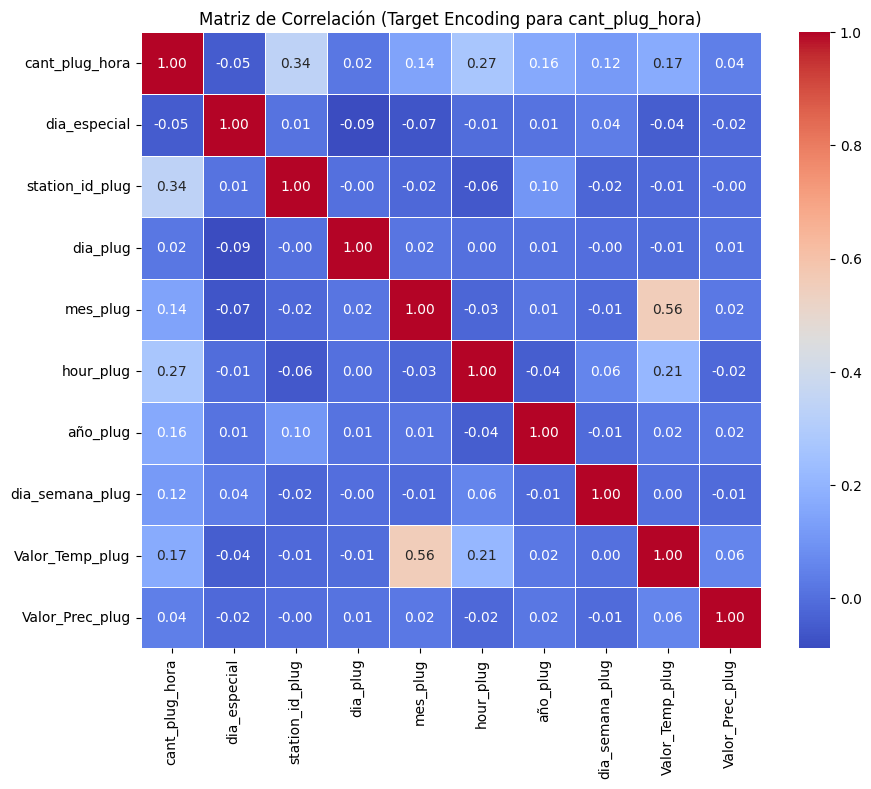


--- Matriz de Correlación con Target Encoding (para cant_unplug_hora) ---


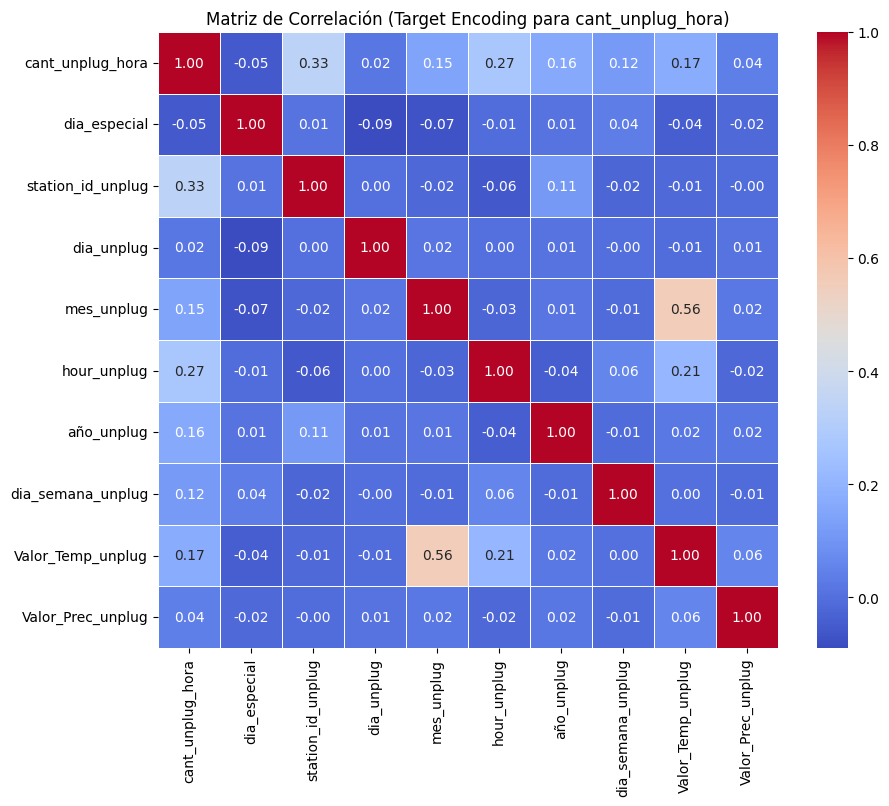

In [ ]:
import pandas as pd
from category_encoders import TargetEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Asumo que basedatos_df ya está cargado y listo.
# Asegúrate de que las columnas 'cant_plug_hora' y 'cant_unplug_hora' sean numéricas.
# Y que las columnas en categorical_cols son aptas para Target Encoding.


# Columnas categóricas específicas a codificar
categorical_cols = ['station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana','Valor_Temp','Valor_Prec']

# Tus variables objetivo
target_plug = 'cant_plug_hora'
target_unplug = 'cant_unplug_hora'

# --- Aplicar Target Encoding para 'cant_plug_hora' ---
df_encoded_for_corr_plug = basedatos_df.copy()

encoder_plug_for_corr = TargetEncoder(cols=categorical_cols)
encoder_plug_for_corr.fit(df_encoded_for_corr_plug[categorical_cols], df_encoded_for_corr_plug[target_plug])

encoded_cols_plug_df = encoder_plug_for_corr.transform(df_encoded_for_corr_plug[categorical_cols])

# --- CAMBIO AQUÍ: Nombres de columnas más cortos ---
encoded_cols_plug_df.columns = [f'{col}_plug' for col in categorical_cols]

df_encoded_for_corr_plug = pd.concat([df_encoded_for_corr_plug.drop(columns=categorical_cols), encoded_cols_plug_df], axis=1)


# --- Aplicar Target Encoding para 'cant_unplug_hora' ---
df_encoded_for_corr_unplug = basedatos_df.copy()

encoder_unplug_for_corr = TargetEncoder(cols=categorical_cols)
encoder_unplug_for_corr.fit(df_encoded_for_corr_unplug[categorical_cols], df_encoded_for_corr_unplug[target_unplug])

encoded_cols_unplug_df = encoder_unplug_for_corr.transform(df_encoded_for_corr_unplug[categorical_cols])

# --- CAMBIO AQUÍ: Nombres de columnas más cortos ---
encoded_cols_unplug_df.columns = [f'{col}_unplug' for col in categorical_cols]

df_encoded_for_corr_unplug = pd.concat([df_encoded_for_corr_unplug.drop(columns=categorical_cols), encoded_cols_unplug_df], axis=1)


# --- Generar la Matriz de Correlación para cada objetivo ---

# Para cant_plug_hora
print("\n--- Matriz de Correlación con Target Encoding (para cant_plug_hora) ---")
cols_for_corr_plug = [col for col in df_encoded_for_corr_plug.columns if col != target_unplug]
matriz_correlacion_plug = df_encoded_for_corr_plug[cols_for_corr_plug].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_plug, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación (Target Encoding para cant_plug_hora)')
plt.show()
#print(matriz_correlacion_plug)


# Para cant_unplug_hora
print("\n--- Matriz de Correlación con Target Encoding (para cant_unplug_hora) ---")
cols_for_corr_unplug = [col for col in df_encoded_for_corr_unplug.columns if col != target_plug]
matriz_correlacion_unplug = df_encoded_for_corr_unplug[cols_for_corr_unplug].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_unplug, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación (Target Encoding para cant_unplug_hora)')
plt.show()
#print(matriz_correlacion_unplug)

Nuevo codigo

In [5]:
import pandas as pd
from category_encoders import TargetEncoder
import joblib # Para guardar los encoders

# Asegúrate de que basedatos_df ya está cargado y preprocesado
# (columnas de fecha/hora extraídas, columnas categóricas identificadas, etc.)

# --- Paso 1: Definir las variables objetivo y las características categóricas ---
target_plug = 'cant_plug_hora'
target_unplug = 'cant_unplug_hora'

# Las columnas categóricas a las que aplicaremos Target Encoding
categorical_cols = ['station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana']

# Si 'dia_especial' existe y quieres incluirla en el análisis de correlación
# Aunque no se le hace Target Encoding, es una feature.
# Asegúrate de que 'dia_especial' está presente en basedatos_df si la incluyes aquí.
numerical_or_binary_features = ['Valor_Temp', 'Valor_Prec','dia_especial']

# --- Paso 2: Crear y entrenar TargetEncoder para 'cant_plug_hora' ---
print("Entrenando Target Encoder para 'cant_plug_hora'...")
encoder_plug = TargetEncoder(cols=categorical_cols)
encoder_plug.fit(basedatos_df[categorical_cols], basedatos_df[target_plug])
joblib.dump(encoder_plug, 'encoder_plug.pkl')
print("Encoder para 'cant_plug_hora' guardado como 'encoder_plug.pkl'.")


# --- Paso 3: Crear y entrenar TargetEncoder para 'cant_unplug_hora' ---
print("Entrenando Target Encoder para 'cant_unplug_hora'...")
encoder_unplug = TargetEncoder(cols=categorical_cols)
encoder_unplug.fit(basedatos_df[categorical_cols], basedatos_df[target_unplug])
joblib.dump(encoder_unplug, 'encoder_unplug.pkl')
print("Encoder para 'cant_unplug_hora' guardado como 'encoder_unplug.pkl'.")


# --- Paso 4: Aplicar los Target Encodings a una copia de los DataFrames para los modelos ---
df_for_model_plug = basedatos_df.copy()
df_for_model_unplug = basedatos_df.copy()

print("Aplicando Target Encoding a los DataFrames para el entrenamiento...")
df_for_model_plug[categorical_cols] = encoder_plug.transform(df_for_model_plug[categorical_cols])
df_for_model_unplug[categorical_cols] = encoder_unplug.transform(df_for_model_unplug[categorical_cols])

print("Target Encoding aplicado. Listos para el entrenamiento de los modelos.")


##---

### **Análisis de Correlaciones (NUEVO)**

##python
# --- Paso 5: Mostrar Correlaciones con cada Target ---

# Features que usaremos para la correlación (categóricas ya encodificadas + numéricas/binarias)
all_features_for_correlation_plug = categorical_cols + numerical_or_binary_features
all_features_for_correlation_unplug = categorical_cols + numerical_or_binary_features # Son las mismas

print("\n--- Correlaciones con 'cant_plug_hora' ---")
# Calculamos la correlación de cada feature con el target_plug
# Usamos el DF ya transformado para 'plug'
correlations_plug = df_for_model_plug[all_features_for_correlation_plug + [target_plug]].corr()[target_plug].drop(target_plug)
print(correlations_plug.sort_values(ascending=False))

print("\n--- Correlaciones con 'cant_unplug_hora' ---")
# Calculamos la correlación de cada feature con el target_unplug
# Usamos el DF ya transformado para 'unplug'
correlations_unplug = df_for_model_unplug[all_features_for_correlation_unplug + [target_unplug]].corr()[target_unplug].drop(target_unplug)
print(correlations_unplug.sort_values(ascending=False))

print("\nAnálisis de correlación completado.")

Entrenando Target Encoder para 'cant_plug_hora'...
Encoder para 'cant_plug_hora' guardado como 'encoder_plug.pkl'.
Entrenando Target Encoder para 'cant_unplug_hora'...
Encoder para 'cant_unplug_hora' guardado como 'encoder_unplug.pkl'.
Aplicando Target Encoding a los DataFrames para el entrenamiento...
Target Encoding aplicado. Listos para el entrenamiento de los modelos.

--- Correlaciones con 'cant_plug_hora' ---
station_id      0.336194
hour            0.268709
año             0.161840
Valor_Temp      0.149832
mes             0.143370
dia_semana      0.115783
dia             0.020416
Valor_Prec     -0.027298
dia_especial   -0.050971
Name: cant_plug_hora, dtype: float64

--- Correlaciones con 'cant_unplug_hora' ---
station_id      0.334999
hour            0.273281
año             0.164404
Valor_Temp      0.153813
mes             0.145753
dia_semana      0.117678
dia             0.020734
Valor_Prec     -0.027472
dia_especial   -0.051807
Name: cant_unplug_hora, dtype: float64

Análisis

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Asegúrate de que df_for_model_plug y df_for_model_unplug
# ya se han creado y tienen las columnas Target Encoded de la PRIMERA PARTE.

# Define tus variables objetivo
target_plug = 'cant_plug_hora'
target_unplug = 'cant_unplug_hora'

# Define TODAS las características (features) que son independientes y que LightGBM usará.
# 'dia_especial' se incluye aquí directamente, no en 'categorical_cols' del encoder.
base_features_independent = [
    'station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana', # Estas ya están Target Encoded
    'Valor_Temp', 'Valor_Prec', 'dia_especial'
]


# --- Proceso para el MODELO 1: Predecir 'cant_plug_hora' ---
X1_features_for_model = base_features_independent
X1 = df_for_model_plug[X1_features_for_model]
y1 = df_for_model_plug[target_plug]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(f"\nDimensiones X1_train (plug): {X1_train.shape}")
# ... (resto del entrenamiento y evaluación del Modelo 1) ...

model_plug_lgbm = lgb.LGBMRegressor(random_state=42, n_estimators=5000, learning_rate=0.1)
model_plug_lgbm.fit(X1_train, y1_train)

predictions_plug_lgbm = model_plug_lgbm.predict(X1_test)
mae_plug_lgbm = mean_absolute_error(y1_test, predictions_plug_lgbm)
mse_plug_lgbm = mean_squared_error(y1_test, predictions_plug_lgbm)
rmse_plug_lgbm = np.sqrt(mse_plug_lgbm)
r2_plug_lgbm = r2_score(y1_test, predictions_plug_lgbm)

print(f'Métricas LightGBM para cant_plug_hora:')
print(f'  MAE: {mae_plug_lgbm:.2f}')
print(f'  MSE: {mse_plug_lgbm:.2f}')
print(f'  RMSE: {rmse_plug_lgbm:.2f}')
print(f'  R²: {r2_plug_lgbm:.2f}')
joblib.dump(model_plug_lgbm, 'model_plug_lgbm.pkl')
print("Modelo 'model_plug_lgbm.pkl' guardado.")


# --- Proceso para el MODELO 2: Predecir 'cant_unplug_hora' ---
X2_features_for_model = base_features_independent
X2 = df_for_model_unplug[X2_features_for_model]
y2 = df_for_model_unplug[target_unplug]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(f"\nDimensiones X2_train (unplug): {X2_train.shape}")
# ... (resto del entrenamiento y evaluación del Modelo 2) ...

model_unplug_lgbm = lgb.LGBMRegressor(random_state=42, n_estimators=5000, learning_rate=0.1)
model_unplug_lgbm.fit(X2_train, y2_train)

predictions_unplug_lgbm = model_unplug_lgbm.predict(X2_test)
mae_unplug_lgbm = mean_absolute_error(y2_test, predictions_unplug_lgbm)
mse_unplug_lgbm = mean_squared_error(y2_test, predictions_unplug_lgbm)
rmse_unplug_lgbm = np.sqrt(mse_unplug_lgbm)
r2_unplug_lgbm = r2_score(y2_test, predictions_unplug_lgbm)

print(f'Métricas LightGBM para cant_unplug_hora:')
print(f'  MAE: {mae_unplug_lgbm:.2f}')
print(f'  MSE: {mse_unplug_lgbm:.2f}')
print(f'  RMSE: {rmse_unplug_lgbm:.2f}')
print(f'  R²: {r2_unplug_lgbm:.2f}')
joblib.dump(model_unplug_lgbm, 'model_unplug_lgbm.pkl')
print("Modelo 'model_unplug_lgbm.pkl' guardado.")


Dimensiones X1_train (plug): (5585712, 9)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.301535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 5585712, number of used features: 9
[LightGBM] [Info] Start training from score 2.595122
Métricas LightGBM para cant_plug_hora:
  MAE: 1.36
  MSE: 3.78
  RMSE: 1.94
  R²: 0.52
Modelo 'model_plug_lgbm.pkl' guardado.

Dimensiones X2_train (unplug): (5585712, 9)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.542479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 5585712, number of used features: 9
[LightGBM] [Info] Start tra

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time # Para medir el tiempo

# Asegúrate de que df_for_model_plug ya se ha creado y tiene las columnas Target Encoded.

# Define tu variable objetivo
target_plug = 'cant_plug_hora'

# Define TODAS las características (features) que son independientes y que LightGBM usará.
# ESTA LISTA ES EXACTAMENTE LA QUE ME DISTE, SIN CLUSTERS.
base_features_independent = [
    'station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana', # Estas ya están Target Encoded
    'Valor_Temp', 'Valor_Prec', 'dia_especial'
]

# --- Proceso para el MODELO 1: Optimizar 'cant_plug_hora' con GridSearchCV ---
print("\n--- Iniciando GridSearchCV para el MODELO PLUG (cant_plug_hora) ---")

X1_features_for_model = base_features_independent # Usamos las features que ya definiste
X1 = df_for_model_plug[X1_features_for_model]
y1 = df_for_model_plug[target_plug]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print(f"Dimensiones X1_train (plug): {X1_train.shape}")

# Definir los parámetros a buscar para LightGBM plug
# Estos son rangos de ejemplo. Puedes ajustarlos o añadir más.
# ¡Cuidado con el n_estimators! Valores altos aquí harán que el GCV tarde MUCHO.
param_grid_plug = {
    'num_leaves': [20, 31],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200] # Valores más bajos para que el GCV sea más rápido
    # Puedes añadir más parámetros aquí si los necesitas.
    # 'max_depth': [-1, 10],
    # 'min_child_samples': [20, 30]
}

# Inicializar el modelo LightGBM
lgbm_plug = lgb.LGBMRegressor(random_state=42)

# Configurar GridSearchCV
# 'neg_mean_absolute_error' para optimizar MAE (GridSearchCV maximiza, por eso es negativo)
grid_search_plug = GridSearchCV(estimator=lgbm_plug,
                                 param_grid=param_grid_plug,
                                 scoring='neg_mean_absolute_error',
                                 cv=3, # 3-fold cross-validation (puedes subir a 5 si el tiempo lo permite)
                                 verbose=2, # Muestra el progreso
                                 n_jobs=-1) # Usa todos los cores de tu CPU

# --- Ejecutar la búsqueda de la cuadrícula y medir el tiempo ---
print("Buscando los mejores hiperparámetros para cant_plug_hora...")
start_time = time.time() # Iniciar el contador de tiempo

grid_search_plug.fit(X1_train, y1_train)

end_time = time.time() # Detener el contador de tiempo
duration_seconds = end_time - start_time
duration_minutes = duration_seconds / 60

print(f"\n--- GridSearchCV para cant_plug_hora completado en {duration_minutes:.2f} minutos ({duration_seconds:.2f} segundos) ---")

print(f"\nMejores parámetros para cant_plug_hora: {grid_search_plug.best_params_}")
# El 'best_score_' es el score de validación cruzada para la mejor combinación de parámetros.
# Recuerda que es el negativo del MAE, así que un número más cercano a cero (menos negativo) es mejor.
print(f"Mejor MAE (negativo) en CV para cant_plug_hora: {grid_search_plug.best_score_:.2f}")

# Evaluar el mejor modelo encontrado por GridSearchCV en el conjunto de prueba
# Este es el mejor estimador que encontró la búsqueda de cuadrícula
best_model_plug_lgbm = grid_search_plug.best_estimator_
predictions_plug_lgbm_tuned = best_model_plug_lgbm.predict(X1_test)

mae_plug_tuned = mean_absolute_error(y1_test, predictions_plug_lgbm_tuned)
mse_plug_tuned = mean_squared_error(y1_test, predictions_plug_lgbm_tuned)
rmse_plug_tuned = np.sqrt(mse_plug_tuned)
r2_plug_tuned = r2_score(y1_test, predictions_plug_lgbm_tuned)

print(f'\nMétricas LightGBM OPTIMIZADO para cant_plug_hora (Conjunto de Prueba):')
print(f'  MAE: {mae_plug_tuned:.2f}')
print(f'  MSE: {mse_plug_tuned:.2f}')
print(f'  RMSE: {rmse_plug_tuned:.2f}')
print(f'  R²: {r2_plug_tuned:.2f}')

# Si quieres guardar este modelo optimizado:
# import joblib
# joblib.dump(best_model_plug_lgbm, 'model_plug_lgbm_tuned.pkl')
# print("Modelo optimizado 'model_plug_lgbm_tuned.pkl' guardado.")


--- Iniciando GridSearchCV para el MODELO PLUG (cant_plug_hora) ---
Dimensiones X1_train (plug): (5585712, 9)
Buscando los mejores hiperparámetros para cant_plug_hora...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.474035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 5585712, number of used features: 9
[LightGBM] [Info] Start training from score 2.595122

--- GridSearchCV para cant_plug_hora completado en 23.51 minutos (1410.65 segundos) ---

Mejores parámetros para cant_plug_hora: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
Mejor MAE (negativo) en CV para cant_plug_hora: -1.52

Métricas LightGBM OPTIMIZADO para cant_plug_hora (Conjunto de Prueba):
  MAE: 1.52
  MSE: 4.78
  RMSE: 2.19
  R²: 0.

In [12]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Asume que X1_train, X1_test, y1_train, y1_test ya están definidos de tu split anterior
# y que df_for_model_plug está lista.

# Definir la lista de características (sin cambios aquí)
target_plug = 'cant_plug_hora' # Definir target_plug si no está ya definido
base_features_independent = [
    'station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana',
    'Valor_Temp', 'Valor_Prec', 'dia_especial'
]
X1_features_for_model = base_features_independent
# Asegúrate de que df_for_model_plug existe y está accesible en este contexto
# Si estás ejecutando esto en una celda separada, puede que necesites volver a cargarla o definirla.
# Por ejemplo:
# import pandas as pd
# df_for_model_plug = pd.read_csv("ruta_a_tu_df_target_encoded.csv") # Si la guardaste
# O si viene de una celda anterior que ya la definió, no necesitas esta línea.

X1 = df_for_model_plug[X1_features_for_model]
y1 = df_for_model_plug[target_plug]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


print("\n--- Reentrenando el Modelo PLUG con los mejores parámetros y más n_estimators ---")

# Mejores parámetros encontrados por GridSearchCV
best_params_from_gcv = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31} # Usamos los que encontraste

# Entrenar un nuevo modelo con los mejores 'learning_rate' y 'num_leaves',
# pero con un 'n_estimators' mayor (ej. 5000 como tenías, o un poco más)
model_plug_lgbm_final_tuned = lgb.LGBMRegressor(
    learning_rate=best_params_from_gcv['learning_rate'],
    num_leaves=best_params_from_gcv['num_leaves'],
    n_estimators=5000, # Volvemos al número alto de árboles. Ajusta si es necesario.
    random_state=42
)

model_plug_lgbm_final_tuned.fit(X1_train, y1_train)

# --- LÍNEA CORREGIDA AQUÍ ---
predictions_plug_lgbm_final_tuned = model_plug_lgbm_final_tuned.predict(X1_test)
# --- FIN DE LÍNEA CORREGIDA ---

mae_plug_final_tuned = mean_absolute_error(y1_test, predictions_plug_lgbm_final_tuned)
mse_plug_final_tuned = mean_squared_error(y1_test, predictions_plug_lgbm_final_tuned)
rmse_plug_final_tuned = np.sqrt(mse_plug_final_tuned)
r2_plug_final_tuned = r2_score(y1_test, predictions_plug_lgbm_final_tuned)

print(f'\nMétricas LightGBM FINAL (Optimizado + N_Estimators Grandes) para cant_plug_hora:')
print(f'  MAE: {mae_plug_final_tuned:.2f}')
print(f'  MSE: {mse_plug_final_tuned:.2f}')
print(f'  RMSE: {rmse_plug_final_tuned:.2f}')
print(f'  R²: {r2_plug_final_tuned:.2f}')

# Puedes guardar el modelo final si lo necesitas
# import joblib
# joblib.dump(model_plug_lgbm_final_tuned, 'model_plug_lgbm_final_tuned.pkl')
# print("Modelo 'model_plug_lgbm_final_tuned.pkl' guardado.")


--- Reentrenando el Modelo PLUG con los mejores parámetros y más n_estimators ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.494776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 472
[LightGBM] [Info] Number of data points in the train set: 5585712, number of used features: 9
[LightGBM] [Info] Start training from score 2.595122

Métricas LightGBM FINAL (Optimizado + N_Estimators Grandes) para cant_plug_hora:
  MAE: 1.36
  MSE: 3.78
  RMSE: 1.94
  R²: 0.52


Con los pkl guardados hacemos una prueba del modelo

In [ ]:
import pandas as pd
import joblib
import requests
from datetime import datetime
import numpy as np

# --- 1. Configuración de la predicción ---
PREDICT_STATION_ID = 43 # Ejemplo: estación 43
TARGET_DATETIME = datetime(2025, 7, 13, 14, 0, 0) # Ejemplo: 13 de julio de 2025, 2 PM (un sábado)

PREDICT_DAY = TARGET_DATETIME.day
PREDICT_MONTH = TARGET_DATETIME.month
PREDICT_YEAR = TARGET_DATETIME.year
PREDICT_HOUR = TARGET_DATETIME.hour
PREDICT_DAY_OF_WEEK = TARGET_DATETIME.weekday() # Lunes=0, Domingo=6

# --- Calcular 'dia_especial' ---
# Esta es una característica NUMÉRICA para el modelo LightGBM.
if PREDICT_DAY_OF_WEEK in [5, 6]: # Sábado (5) o Domingo (6)
    PREDICT_DIA_ESPECIAL = 1
else:
    PREDICT_DIA_ESPECIAL = 0
print(f"Día especial para predicción: {PREDICT_DIA_ESPECIAL} (1=Sí, 0=No)")

# --- 2. Función para obtener el Pronóstico Meteorológico de Open-Meteo ---
def get_future_weather_forecast(latitude, longitude, target_datetime):
    date_str = target_datetime.strftime('%Y-%m-%d')
    hour = target_datetime.hour

    url = (f"https://api.open-meteo.com/v1/forecast?"
           f"latitude={latitude}&longitude={longitude}&"
           f"hourly=temperature_2m,precipitation&"
           f"start_date={date_str}&end_date={date_str}&"
           f"timezone=Europe%2FBerlin")

    print(f"Consultando API de pronóstico para el tiempo: {url}")
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        hourly_data = data.get('hourly', {})

        if not hourly_data:
            print("No se encontraron datos horarios para la fecha especificada de pronóstico.")
            return None, None

        df = pd.DataFrame({
            'time': pd.to_datetime(hourly_data.get('time', [])),
            'temperature_2m': hourly_data.get('temperature_2m', []),
            'precipitation': hourly_data.get('precipitation', [])
        })
        df['hour'] = df['time'].dt.hour

        data_at_target_hour = df[df['hour'] == hour]

        if not data_at_target_hour.empty:
            temp = data_at_target_hour['temperature_2m'].iloc[0]
            prec = data_at_target_hour['precipitation'].iloc[0]
            return temp, prec
        else:
            print(f"No se encontró pronóstico para la hora {hour}:00 en la fecha {date_str}.")
            return None, None
    else:
        print(f"Error al obtener datos de pronóstico: {response.status_code} - {response.text}")
        return None, None

# --- Obtener los datos meteorológicos ---
LATITUDE_MADRID = 40.4168
LONGITUDE_MADRID = -3.7038

PREDICT_TEMP, PREDICT_PREC = get_future_weather_forecast(
    LATITUDE_MADRID, LONGITUDE_MADRID, TARGET_DATETIME
)

if PREDICT_TEMP is None:
    print("No se pudo obtener la temperatura pronosticada. Usando 20.0°C como por defecto.")
    PREDICT_TEMP = 20.0
if PREDICT_PREC is None:
    print("No se pudo obtener la precipitación pronosticada. Usando 0.0 mm/h como por defecto.")
    PREDICT_PREC = 0.0

print(f"\n--- Pronóstico Meteorológico Obtenido ---")
print(f"  Temperatura: {PREDICT_TEMP}°C")
print(f"  Precipitación: {PREDICT_PREC} mm/h")


# --- 3. Preparar los datos de entrada RAW ---
# 'dia_especial' se incluye aquí, pero NO pasará por el TargetEncoder.
new_data_point_raw = pd.DataFrame([{
    'station_id': PREDICT_STATION_ID,
    'dia': PREDICT_DAY,
    'mes': PREDICT_MONTH,
    'año': PREDICT_YEAR,
    'dia_semana': PREDICT_DAY_OF_WEEK,
    'hour': PREDICT_HOUR,
    'Valor_Temp': PREDICT_TEMP,
    'Valor_Prec': PREDICT_PREC,
    'dia_especial': PREDICT_DIA_ESPECIAL # Directamente para el modelo
}])


# --- 4. Cargar el encoder y el modelo ---
try:
    loaded_unplug_encoder = joblib.load('encoder_unplug.pkl')
    loaded_unplug_model = joblib.load('model_unplug_lgbm.pkl')
    print("\nEncoders y modelos de 'unplug' cargados exitosamente.")
except FileNotFoundError as e:
    print(f"ERROR: No se encontró uno o ambos archivos .pkl. Asegúrate de que los has generado y están en la ruta correcta.")
    print(f"Detalle del error: {e}")
    exit()

# --- 5. Definir columnas categóricas para el Target Encoding ---
# ¡Solo las 6 columnas con las que tu ENCODER fue entrenado!
cols_to_encode_for_prediction = ['station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana']


# --- 6. Aplicar el Target Encoding ---
# Asegúrate de copiar solo las columnas relevantes para el encoder
data_for_encoding = new_data_point_raw[cols_to_encode_for_prediction].copy()
encoded_data = loaded_unplug_encoder.transform(data_for_encoding)

# Creamos el DataFrame final uniendo las columnas codificadas con las no codificadas
final_input_for_prediction = pd.DataFrame(encoded_data, columns=cols_to_encode_for_prediction)

# Añadir las columnas numéricas que no pasaron por el encoder
final_input_for_prediction['Valor_Temp'] = new_data_point_raw['Valor_Temp'].values[0]
final_input_for_prediction['Valor_Prec'] = new_data_point_raw['Valor_Prec'].values[0]
final_input_for_prediction['dia_especial'] = new_data_point_raw['dia_especial'].values[0] # Añadir dia_especial directamente

# --- 7. Ordenar las columnas para el modelo LightGBM ---
# ¡Las columnas deben estar en el mismo orden que en el entrenamiento del modelo LightGBM!
model_unplug_expected_features = [
    'station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana', # Estas 6 (ahora TE)
    'Valor_Temp', 'Valor_Prec',
    'dia_especial' # Esta (numérica)
]

final_input_for_prediction = final_input_for_prediction[model_unplug_expected_features]

print("\n--- Datos de entrada procesados para el modelo de bicicletas ---")
print(final_input_for_prediction)
print("\nNota: 6 variables categóricas han sido Target Encoded. 'dia_especial' se mantiene como numérica.")


# --- 8. Realizar la predicción y redondear ---
predicted_unplug_count_raw = loaded_unplug_model.predict(final_input_for_prediction)
predicted_unplug_count_rounded = np.round(predicted_unplug_count_raw[0])
predicted_unplug_count_final = max(0, predicted_unplug_count_rounded)


print(f"\n--- Resultado Final de la Predicción de Bicicletas ---")
print(f"Escenario de predicción:")
print(f"  Estación: {PREDICT_STATION_ID}")
print(f"  Fecha y Hora: {TARGET_DATETIME.strftime('%Y-%m-%d')} a las {PREDICT_HOUR}:00 (Día semana: {PREDICT_DAY_OF_WEEK})")
print(f"  Temperatura Obtenida: {PREDICT_TEMP}°C, Precipitación Obtenida: {PREDICT_PREC}mm")
print(f"  Día Especial: {PREDICT_DIA_ESPECIAL} (1=Sí, 0=No)")

print(f"\n**Predicción de Desenganches (cant_unplug_hora): {int(predicted_unplug_count_final)} bicicletas**")

Día especial para predicción: 1 (1=Sí, 0=No)
Consultando API de pronóstico para el tiempo: https://api.open-meteo.com/v1/forecast?latitude=40.4168&longitude=-3.7038&hourly=temperature_2m,precipitation&start_date=2025-07-13&end_date=2025-07-13&timezone=Europe%2FBerlin

--- Pronóstico Meteorológico Obtenido ---
  Temperatura: 30.1°C
  Precipitación: 0.0 mm/h

Encoders y modelos de 'unplug' cargados exitosamente.

--- Datos de entrada procesados para el modelo de bicicletas ---
   station_id       dia       mes     hour       año  dia_semana  Valor_Temp  \
0    5.921598  2.709666  2.776386  3.26329  2.595597     2.01735        30.1   

   Valor_Prec  dia_especial  
0         0.0             1  

Nota: 6 variables categóricas han sido Target Encoded. 'dia_especial' se mantiene como numérica.

--- Resultado Final de la Predicción de Bicicletas ---
Escenario de predicción:
  Estación: 43
  Fecha y Hora: 2025-07-13 a las 14:00 (Día semana: 6)
  Temperatura Obtenida: 30.1°C, Precipitación Obte

In [ ]:
import pandas as pd
import joblib
import requests
from datetime import datetime
import numpy as np

# --- 1. Configuración de la predicción ---
PREDICT_STATION_ID = 43 # Ejemplo: estación 43
TARGET_DATETIME = datetime(2025, 7, 13, 14, 0, 0) # Ejemplo: 13 de julio de 2025, 2 PM (un sábado)

PREDICT_DAY = TARGET_DATETIME.day
PREDICT_MONTH = TARGET_DATETIME.month
PREDICT_YEAR = TARGET_DATETIME.year
PREDICT_HOUR = TARGET_DATETIME.hour
PREDICT_DAY_OF_WEEK = TARGET_DATETIME.weekday() # Lunes=0, Domingo=6

# --- Calcular 'dia_especial' ---
# Esta es una característica NUMÉRICA para el modelo LightGBM.
if PREDICT_DAY_OF_WEEK in [5, 6]: # Sábado (5) o Domingo (6)
    PREDICT_DIA_ESPECIAL = 1
else:
    PREDICT_DIA_ESPECIAL = 0
print(f"Día especial para predicción: {PREDICT_DIA_ESPECIAL} (1=Sí, 0=No)")

# --- 2. Función para obtener el Pronóstico Meteorológico de Open-Meteo ---
def get_future_weather_forecast(latitude, longitude, target_datetime):
    date_str = target_datetime.strftime('%Y-%m-%d')
    hour = target_datetime.hour

    url = (f"https://api.open-meteo.com/v1/forecast?"
           f"latitude={latitude}&longitude={longitude}&"
           f"hourly=temperature_2m,precipitation&"
           f"start_date={date_str}&end_date={date_str}&"
           f"timezone=Europe%2FBerlin") # Zona horaria de Madrid (CET/CEST)

    print(f"Consultando API de pronóstico para el tiempo: {url}")
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        hourly_data = data.get('hourly', {})

        if not hourly_data:
            print("No se encontraron datos horarios para la fecha especificada de pronóstico.")
            return None, None

        df = pd.DataFrame({
            'time': pd.to_datetime(hourly_data.get('time', [])),
            'temperature_2m': hourly_data.get('temperature_2m', []),
            'precipitation': hourly_data.get('precipitation', [])
        })
        df['hour'] = df['time'].dt.hour

        data_at_target_hour = df[df['hour'] == hour]

        if not data_at_target_hour.empty:
            temp = data_at_target_hour['temperature_2m'].iloc[0]
            prec = data_at_target_hour['precipitation'].iloc[0]
            return temp, prec
        else:
            print(f"No se encontró pronóstico para la hora {hour}:00 en la fecha {date_str}.")
            return None, None
    else:
        print(f"Error al obtener datos de pronóstico: {response.status_code} - {response.text}")
        return None, None

# --- Obtener los datos meteorológicos ---
LATITUDE_MADRID = 40.4168
LONGITUDE_MADRID = -3.7038

PREDICT_TEMP, PREDICT_PREC = get_future_weather_forecast(
    LATITUDE_MADRID, LONGITUDE_MADRID, TARGET_DATETIME
)

if PREDICT_TEMP is None:
    print("No se pudo obtener la temperatura pronosticada. Usando 20.0°C como por defecto.")
    PREDICT_TEMP = 20.0
if PREDICT_PREC is None:
    print("No se pudo obtener la precipitación pronosticada. Usando 0.0 mm/h como por defecto.")
    PREDICT_PREC = 0.0

print(f"\n--- Pronóstico Meteorológico Obtenido ---")
print(f"  Temperatura: {PREDICT_TEMP}°C")
print(f"  Precipitación: {PREDICT_PREC} mm/h")


# --- 3. Preparar los datos de entrada RAW ---
# 'dia_especial' se incluye aquí, pero NO pasará por el TargetEncoder.
new_data_point_raw = pd.DataFrame([{
    'station_id': PREDICT_STATION_ID,
    'dia': PREDICT_DAY,
    'mes': PREDICT_MONTH,
    'año': PREDICT_YEAR,
    'dia_semana': PREDICT_DAY_OF_WEEK,
    'hour': PREDICT_HOUR,
    'Valor_Temp': PREDICT_TEMP,
    'Valor_Prec': PREDICT_PREC,
    'dia_especial': PREDICT_DIA_ESPECIAL # Directamente para el modelo
}])


# --- 4. Cargar el encoder y el modelo de enganches (plug) ---
try:
    loaded_plug_encoder = joblib.load('encoder_plug.pkl') # ¡Cargamos el encoder de plug!
    loaded_plug_model = joblib.load('model_plug_lgbm.pkl') # ¡Cargamos el modelo de plug!
    print("\nEncoders y modelos de 'plug' cargados exitosamente.")
except FileNotFoundError as e:
    print(f"ERROR: No se encontró uno o ambos archivos .pkl. Asegúrate de que los has generado y están en la ruta correcta.")
    print(f"Detalle del error: {e}")
    exit()

# --- 5. Definir columnas categóricas para el Target Encoding ---
# ¡Solo las 6 columnas con las que tu ENCODER_PLUG fue entrenado!
cols_to_encode_for_prediction = ['station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana']


# --- 6. Aplicar el Target Encoding ---
# Asegúrate de copiar solo las columnas relevantes para el encoder
data_for_encoding = new_data_point_raw[cols_to_encode_for_prediction].copy()
encoded_data = loaded_plug_encoder.transform(data_for_encoding)

# Creamos el DataFrame final uniendo las columnas codificadas con las no codificadas
final_input_for_prediction = pd.DataFrame(encoded_data, columns=cols_to_encode_for_prediction)

# Añadir las columnas numéricas que no pasaron por el encoder
final_input_for_prediction['Valor_Temp'] = new_data_point_raw['Valor_Temp'].values[0]
final_input_for_prediction['Valor_Prec'] = new_data_point_raw['Valor_Prec'].values[0]
final_input_for_prediction['dia_especial'] = new_data_point_raw['dia_especial'].values[0] # Añadir dia_especial directamente

# --- 7. Ordenar las columnas para el modelo LightGBM ---
# ¡Las columnas deben estar en el mismo orden que en el entrenamiento del modelo LightGBM!
model_plug_expected_features = [
    'station_id', 'dia', 'mes', 'hour', 'año', 'dia_semana', # Estas 6 (ahora TE)
    'Valor_Temp', 'Valor_Prec',
    'dia_especial' # Esta (numérica)
]

final_input_for_prediction = final_input_for_prediction[model_plug_expected_features]

print("\n--- Datos de entrada procesados para el modelo de bicicletas ---")
print(final_input_for_prediction)
print("\nNota: 6 variables categóricas han sido Target Encoded. 'dia_especial' se mantiene como numérica.")


# --- 8. Realizar la predicción y redondear ---
predicted_plug_count_raw = loaded_plug_model.predict(final_input_for_prediction)
predicted_plug_count_rounded = np.round(predicted_plug_count_raw[0])
predicted_plug_count_final = max(0, predicted_plug_count_rounded)


print(f"\n--- Resultado Final de la Predicción de Bicicletas ---")
print(f"Escenario de predicción:")
print(f"  Estación: {PREDICT_STATION_ID}")
print(f"  Fecha y Hora: {TARGET_DATETIME.strftime('%Y-%m-%d')} a las {PREDICT_HOUR}:00 (Día semana: {PREDICT_DAY_OF_WEEK})")
print(f"  Temperatura Obtenida: {PREDICT_TEMP}°C, Precipitación Obtenida: {PREDICT_PREC}mm")
print(f"  Día Especial: {PREDICT_DIA_ESPECIAL} (1=Sí, 0=No)")

print(f"\n**Predicción de Enganches (cant_plug_hora): {int(predicted_plug_count_final)} bicicletas**")

Día especial para predicción: 1 (1=Sí, 0=No)
Consultando API de pronóstico para el tiempo: https://api.open-meteo.com/v1/forecast?latitude=40.4168&longitude=-3.7038&hourly=temperature_2m,precipitation&start_date=2025-07-13&end_date=2025-07-13&timezone=Europe%2FBerlin

--- Pronóstico Meteorológico Obtenido ---
  Temperatura: 30.1°C
  Precipitación: 0.0 mm/h

Encoders y modelos de 'plug' cargados exitosamente.

--- Datos de entrada procesados para el modelo de bicicletas ---
   station_id      dia       mes      hour       año  dia_semana  Valor_Temp  \
0    6.001912  2.70961  2.776372  3.262226  2.595391    2.017241        30.1   

   Valor_Prec  dia_especial  
0         0.0             1  

Nota: 6 variables categóricas han sido Target Encoded. 'dia_especial' se mantiene como numérica.

--- Resultado Final de la Predicción de Bicicletas ---
Escenario de predicción:
  Estación: 43
  Fecha y Hora: 2025-07-13 a las 14:00 (Día semana: 6)
  Temperatura Obtenida: 30.1°C, Precipitación Obteni